In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## paths

In [70]:
prototxt = "D:/par/ImageProcessing/colorization_deploy_v2.prototxt"
caffe_model = "D:/par/ImageProcessing/colorization_release_v2.caffemodel"
pts_npy = "D:/par/ImageProcessing/pts_in_hull.npy"

In [71]:
net = cv.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)
 
layer1 = net.getLayerId("class8_ab")
layer2 = net.getLayerId("conv8_313_rh")

pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

In [72]:
myimage = cv.imread("lion.jpg")

In [73]:
myimage = cv.cvtColor(myimage, cv.COLOR_BGR2GRAY)

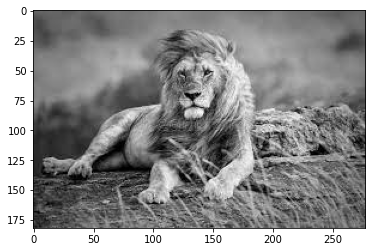

In [74]:
myimage = cv.cvtColor(myimage, cv.COLOR_GRAY2RGB)
plt.imshow(myimage)

In [75]:
normalized = myimage.astype("float32") / 255.0

In [76]:
lab_image = cv.cvtColor(normalized, cv.COLOR_RGB2LAB)

In [77]:
resized = cv.resize(lab_image, (224, 224))
L = cv.split(resized)[0]
L -= 50

In [78]:
net.setInput(cv.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

In [79]:
ab = cv.resize(ab, (myimage.shape[1], myimage.shape[0]))
L = cv.split(lab_image)[0]
LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


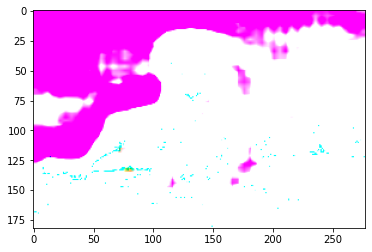

In [80]:
plt.imshow(LAB_colored)

In [81]:
RGB_colored = cv.cvtColor(LAB_colored,cv.COLOR_LAB2RGB)
RGB_colored = np.clip(RGB_colored, 0, 1)
RGB_colored = (255 * RGB_colored).astype("uint8")

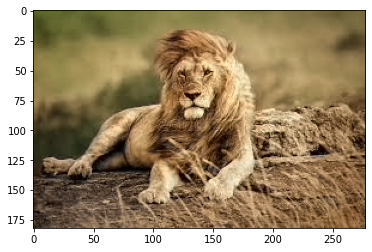

In [82]:
plt.imshow(RGB_colored)

In [83]:
RGB_BGR = cv.cvtColor(RGB_colored, cv.COLOR_RGB2BGR)
cv.imwrite("colorize.png",RGB_BGR)

True